Epoch 1/100
329/329 [==============================] - 1s 3ms/step - loss: 0.9139 - acc: 0.7243 - val_loss: 0.2591 - val_acc: 0.9250
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2275 - acc: 0.9347 - val_loss: 0.1938 - val_acc: 0.9425
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1688 - acc: 0.9519 - val_loss: 0.1678 - val_acc: 0.9516
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1410 - acc: 0.9589 - val_loss: 0.1490 - val_acc: 0.9551
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1155 - acc: 0.9666 - val_loss: 0.1352 - val_acc: 0.9602
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 0.0989 - acc: 0.9725 - val_loss: 0.1398 - val_acc: 0.9594
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 0.0863 - acc: 0.9755 - val_loss: 0.1280 - val_acc: 0.9618
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - 

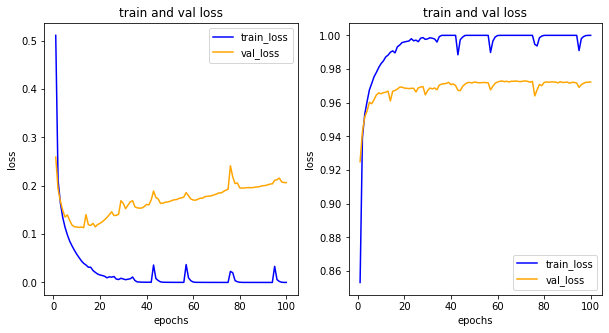

In [63]:
## MINIST 데이터셋 다운받기
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

"""
## 데이터의 형태 확인하기
# 학습데이터
print(x_train.shape, y_train.shape)
print(x_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(x_test)
"""
"""
## 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
#0~599999의 범위에서 무작위로 세 개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d % (idx, label)')
"""

from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)


# 모델 입력을 위한 데이터 전처리
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255


# 모델 입력을 위한 레이블 전처리
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층

model.add(Dense(64, activation = 'relu', input_shape = (784,)))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

## 소프트맥스와 시그모이드 값의 비교 
def softmax(arr):
    m = np.max(arr)
    arr = arr - m    # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한

## 학습과정 설정하기
model.compile(optimizer = 'adam',  # 옵티마이저: Adam
             # 손실함수: categorical_crossentropy
              loss='categorical_crossentropy',
             # 모니터링 할 평가지표: acc
              metrics = ['acc']
             )

## 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 100, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val)
                   )

## history를 통해 확인해볼 수 있는 값 출력하기

history.history.keys()

## 학습 결과 그려보기

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증데이터가 있는 경우 val_ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 손실 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

313/313 [==============================] - 0s 855us/step - loss: 0.1945 - acc: 0.9740
(10000, 10)
각 클래스에 속할 확률 : 
[3.9578910e-19 1.2446445e-21 6.7194917e-18 3.8302278e-11 4.1158539e-34
 3.1523057e-19 2.9815273e-34 1.0000000e+00 1.5298347e-22 1.1452822e-14]


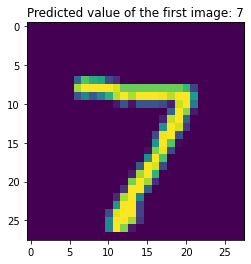

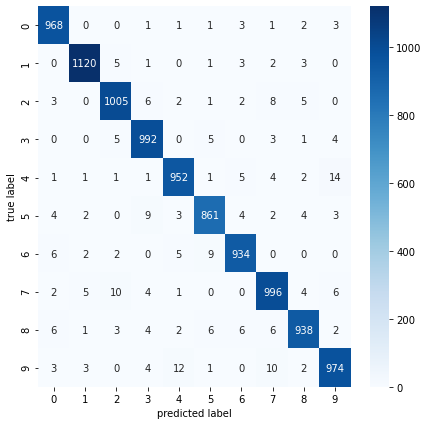

In [69]:
# 모델 평가하기
model.evaluate(x_test, y_test)

# 학습된 모델을 통해 값 예측하기
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision = 7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results [0]}')

# 예측값 그려서 확인해보기
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image: ' + str(arg_results[0]))
plt.show()

## 모델 평가 방법1 - 혼동행렬
# sklearn.metrics 모듈은 여러 가지 평가지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬을 만듭니다.
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1),np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

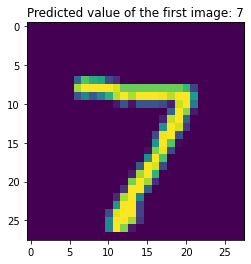

NameError: name 'result' is not defined

<Figure size 504x504 with 0 Axes>